# Assigment 6

## Upload your code (.ipynb) on Learn dropbox and submit pdfs of the code and the mathematical questions to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Rank-Sparsity 

## Question 1

Implement ADMM for the problem of separating a background image from foreground interference. Download the datasets at: http://www.svcl.ucsd.edu/projects/background_subtraction/JPEGS.tar.gz 

You will have to solve this problem:

$$
\begin{align*}
\mbox{minimize} & \ \|L\|_* + \gamma \|M\|_1 \\
\mbox{subj. to:} & \ L+M=A
\end{align*}
$$

where $\gamma>0$ is a parameter that you will have to tune. 

Use only the first dataset, birds, which contains 71 jpeg images each with 37752 gray-scale pixels. Form a matrix A of size 37752 x 71 with these images. 

When you are done, print the background image (that is, columns of the component L) for frames 1, 11, ..., 71. 

Note that this algorithm requires SVD. Computing the SVD in the usual way is very expensive for this dataset because the U matrix in SVD has size 37752 × 37752. You will have to utilize the "economy" SVD in https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html
or 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
by setting the option full_matrices = False.

Marks: 33.

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
from scipy import linalg
from numpy.linalg import norm
import scipy

156 242


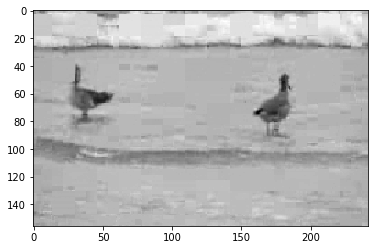

In [29]:
img = cv2.imread('JPEGS/birds/frame_1.jpg', cv2.IMREAD_GRAYSCALE)
row,col = img.shape[0],img.shape[1]
print(row,col)
A = np.zeros([37752,71])
for i in range(71):
    file_path = 'JPEGS/birds/frame_' + str(i+1) +'.jpg'
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = np.reshape(img,(37752))
    A[:,i] = img
plt.imshow(A[:,0].reshape((row,col)), cmap = 'gray')

In [19]:
def prox_L(x, p):
    U, s, Vh = linalg.svd(x,full_matrices=False)
    condition = 1/p
    prox = np.where(s >=condition, s - condition, 0)
#     result = np.zeros([len(s),Vh.shape[0]])
#     np.fill_diagonal(result,prox)
    result = scipy.linalg.diagsvd(prox,len(prox),len(prox))
    result = (U.dot(result)).dot(Vh)
    return result

def prox_M(u,gamma,p):
    condition = gamma/p
    result = np.where(u>=condition, u - condition, u)
    result = np.where(np.absolute(u)<=condition, 0, result)
    result = np.where(u<=-condition, u + condition, result)
    return result



def admm(A, p, max_iteration, gamma):
    M = np.random.rand(A.shape[0],A.shape[1])
    Y = np.zeros(A.shape)
    iteration = 0
    while iteration < max_iteration:
        x = -M + A - Y/p
        L = prox_L(x,p)
        u = -L + A - Y/p
        M = prox_M(u,gamma,p)
        Y = Y + p*(L + M - A)
        iteration +=1
        e = norm(L+M-A,2)
        
        if e<epsilon: break
    return L, M

In [20]:
max_iteration = 30000
p = 1
gamma = 1/500
epsilon = 1e-20
result,m1 = admm(A,p,10000,gamma)


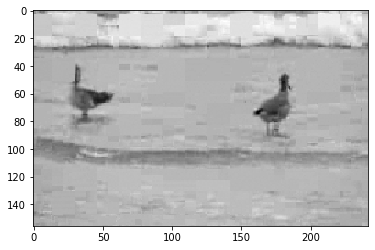

In [10]:
plt.imshow(result[:,0].reshape((row,col)), cmap = 'gray')

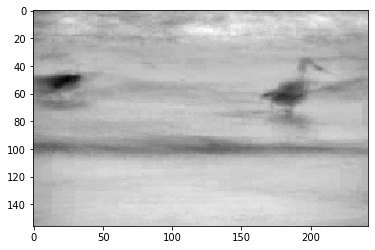

In [219]:
plt.imshow(result[:,10].reshape((row,col)), cmap = 'gray')

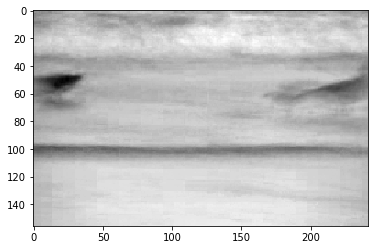

In [220]:
plt.imshow(result[:,20].reshape((row,col)), cmap = 'gray')

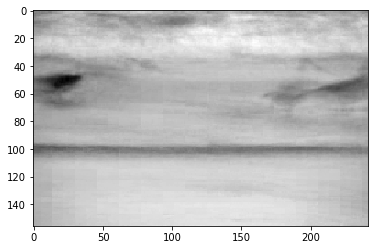

In [221]:
plt.imshow(result[:,30].reshape((row,col)), cmap = 'gray')

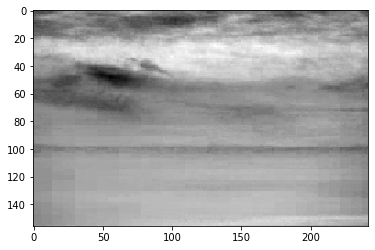

In [222]:
plt.imshow(result[:,40].reshape((row,col)), cmap = 'gray')

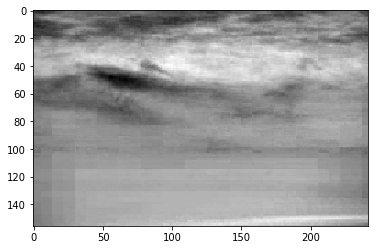

In [223]:
plt.imshow(result[:,50].reshape((row,col)), cmap = 'gray')

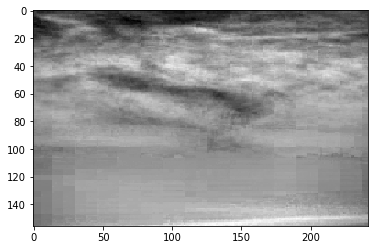

In [224]:
plt.imshow(result[:,60].reshape((row,col)), cmap = 'gray')

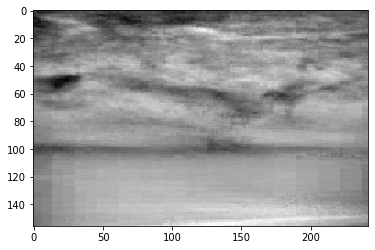

In [225]:
plt.imshow(result[:,70].reshape((row,col)), cmap = 'gray')

## Robust Linear Regression

## Question 2

Implement AM-RR (alternating minimization for robust regresion) on the same dataset as Q1. Form a matrix X whose columns are the first 70 bird images. Form a vector y that is the 71st image. Then try to fit $$y\approx Xw $$ using the Robust Linear Regression problem. 

Illustrate the following two plots. The first plot should show the image that was not covered by set S (S is an output of AM-RR). In other words, y(S^c), where S^c is the complement of S with respect to the set of all pixels. Pixels in S should be set to white (255, when the grey scale image is from 0 to 255) in this image. 

The second plot should show the image indexed by S, in other words, X(S,:)w. Fill in the entries not indexed by S 
to white. 

Marks: 33.

In [21]:
X = A[:,:70]
Y = A[:,70]

In [22]:
def compute_LConstant(x):
    return norm(x,2)**2

def amrr(x,y,k,max_iteration,epsilon):
    n = y.shape[0]
    s = [i for i in range(n-k)]
    s = np.array(s)
    w = np.zeros(70)
    
    
    
    iteration = 0
    while iteration < max_iteration:
        x_part = x[s]
        y_part = y[s]
        step_size = 1/compute_LConstant(x_part)
        w = w - step_size* np.sum(np.multiply(x_part.dot(w) - y_part,x_part.T),axis = 1)
        
        u = np.square(y-x.dot(w))
#         print(u)
        s = np.argsort(u,axis  =0)[:n-k]
        iteration+=1
        e = norm(y - X.dot(w),2)
        print(e)
        if e < epsilon:break
        print(iteration)
    return w,s
    

In [23]:
print(compute_LConstant(X))

67790133973.21924


In [24]:
k = 700
epsilon = 1e-3
w,index = amrr(X,Y,k,100,epsilon)

3397.2112933608614
1
3399.801936446516
2
3399.4447448088195
3
3398.6524096828725
4
3397.820530077125
5
3396.9903083891895
6
3396.1617411691977
7
3395.3546786469983
8
3394.5288970085103
9
3393.7047613708146
10
3392.8822683039775
11
3392.061414384561
12
3391.241638612578
13
3390.423727163492
14
3389.6074457945383
15
3388.792791104892
16
3387.999934784539
17
3387.188154401026
18
3386.377991838218
19
3385.5694437169823
20
3384.762642254049
21
3383.9773137278257
22
3383.17306298354
23
3382.3704149810724
24
3381.569366368148
25
3380.7699137988993
26
3379.9720539338446
27
3379.2160687391793
28
3378.4206350387385
29
3377.6267869710173
30
3376.8345212129284
31
3376.0438344477534
32
3375.254723365137
33
3374.4667302767853
34
3373.680683556504
35
3372.896084152503
36
3372.1130481137156
37
3371.3315721587232
38
3370.551448087106
39
3369.7729135149375
40
3368.9959299266643
41
3368.2204940640495
42
3367.446602675131
43
3366.674250570927
44
3365.9238797058338
45
3365.1542468734096
46
3364.38614681093

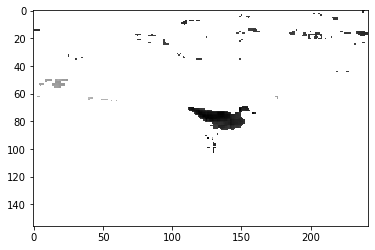

In [27]:
result = Y
result[index] = 255
plt.imshow(result.reshape((row,col)), cmap = 'gray')

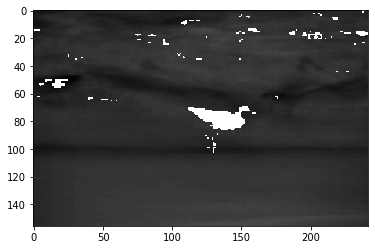

In [28]:
y_estimate = X[index].dot(w)
result = np.full(Y.shape,255)
result[index] = y_estimate
plt.imshow(result.reshape((row,col)), cmap = 'gray')

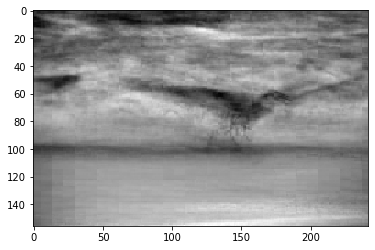

In [101]:
plt.imshow(X.dot(w).reshape((row,col)), cmap = 'gray')

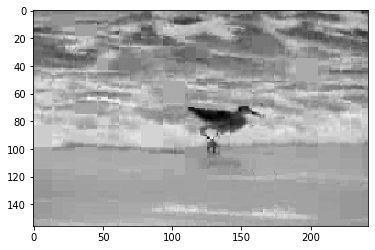

In [87]:
plt.imshow(A[:,70].reshape((row,col)), cmap = 'gray')

## Nonnegative matrix factorization

Consider the nonnegative matrix factorization problem. For this problem, we showed that the modified multiplicative updates algorithm satisfies the nonnegativity constraints at each iteration. Consider now the nonnegative sparse coding problem:
$$
\begin{align*}
\mbox{minimize}_{W,H} &  \ F(W,H):= \frac{1}{2}\| WH-X\|_F^2 + \lambda \|H\|_1\\
\mbox{subj. to} & \ W_{ij}\ge 0 \ \forall i,j \\
                &  \ H_{ij}\ge 0 \ \forall i,j,
\end{align*}
$$
where 
$$
\|H\|_1 = \sum_{i,j} |H_{ij}|.
$$
and $\lambda \ge 0$ is a parameter that controls the effect of the l1-norm. This problem is called sparse coding because the l1-norm forces a lot of weights in matrix $H$ to become zero.

## Question 3

Show that the modified multiplicative updates algorithm for the above nonnegative sparse coding problem also satisfies the nonnegative constraints at each iteration. 

Marks: 5

## Question 4

Use the face dataset, see Assigment 5. Set parameter $r=6$ in the nonnegative factorization problem. Plot $\frac{1}{2}\| WH-X\|_F^2$ as $\lambda$ increases.

Marks: 12

## Question 5

Choose a $\lambda$ and extract the features matrix $W$ by solving the nonnegative matrix factorization problem. Report the 6 features of the faces dataset, i.e., the 6 columns of matrix $W$. You can report the features by visualizing them in a similar way to the above example.

Marks: 12

## Question 6

For your chosen $\lambda$, which are the most important features of the first 6 faces? Provide the code on how to obtain the most important features.

Marks: 5

Dataset consists of 400 faces


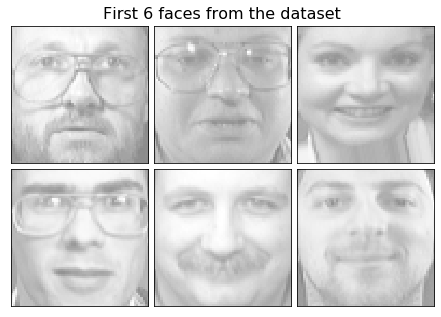

In [103]:
# This piece of code is for loading data and visualizing 
# the first 6 images in the dataset.

# Useful packages for loading the data and plotting
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 2, 3
image_shape = (64, 64)
rng = RandomState(0)

# Useful function for plotting
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)

# Store the vectorized images. Each image has dimensions 64 x 64.
faces = dataset.data
n_samples = faces.shape[0]
print("Dataset consists of %d faces" % n_samples)
    
plot_gallery("First 6 faces from the dataset", faces[:6])    

In [117]:
def prox_L1 (u, a):
    result = np.where(u >= a, u-a, 0)
    result = np.where(u <= -a, u+a, result)
    return result

def grad_H(W, H, X):
    return W.T.dot(W.dot(H) - X)

def grad_W(W, H, X):
    return (W.dot(H) - X).dot(H.T)

def obj_HW(W, H, X):
    obj = W.dot(H) - X
    return (1/2)*np.trace(obj.dot(obj.T))

def WH_bar(WH, sigma, gradient_WH):
    max_WH = np.where(WH > sigma, WH, sigma)
    WH = np.where(gradient_WH >= 0, WH, max_WH)
    return WH

def face_extract(x, sigma, yita, max_iteration, lambda_):
    W = np.random.random([x.shape[0], 6])
    S = np.diag(1/(W.sum(axis = 0)))
    S_inv = np.diag(W.sum(axis = 0))
    H = np.random.random([6, x.shape[1]])
    yita_W = yita * np.ones(W.shape)
    yita_H = yita * np.ones(H.shape)
    iteration = 0
    while iteration < max_iteration:
        gradient_H = grad_H(W, H, x)
        gradient_W = grad_W(W, H, x)
        
        H_bar = WH_bar(H, sigma, gradient_H)
        W_bar = WH_bar(W, sigma, gradient_W)
        
        denominator_H = (W.T.dot(W)).dot(H_bar) + yita_H
        alpha = np.divide(H_bar, denominator_H)
        u = H - alpha * gradient_H
        H_new = prox_L1(u, alpha * lambda_)
        
        gradient_W_new = grad_W(W, H_new, x)
        denominator_W = W_bar.dot(H.dot(H.T)) + yita_W
        W_new = W - np.divide(W_bar, denominator_W)*gradient_W_new
        
        S = np.diag(1/W_new.sum(axis = 0))
        S_inv = np.diag(W_new.sum(axis = 0))
        
        W = W_new.dot(S)
        H = S_inv.dot(H_new)
        
        iteration += 1
    return W,H


In [118]:
X = faces.T



In [126]:
f_array = []
for l in np.linspace(0.01, 0.12, 12):
    print(l)
    W,H = face_extract(X, 0.5, 0.5, 100,l)
    f_array.append(obj_HW(W, H, X))
print(f_array)

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
[9339.679300031275, 8736.799442084644, 8757.621878404194, 9046.26106382123, 8896.22199102815, 9254.51585732771, 10191.565408684633, 9683.643358845307, 9931.073958099274, 9740.261911233105, 11001.013577579732, 11008.93157058207]


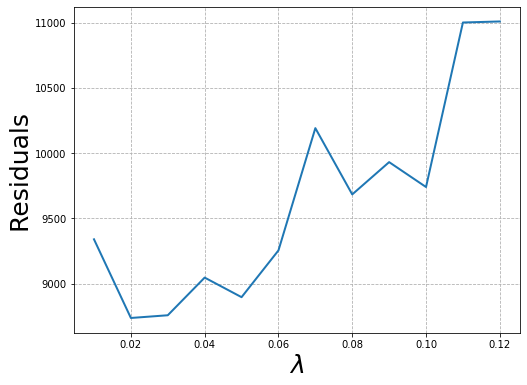

In [127]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.01, 0.12, 12), f_array,linewidth=2.0)
# plt.legend(prop={'size': 20},loc="lower left")
plt.xlabel("$\lambda$", fontsize=25)
plt.ylabel("Residuals", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [108]:
print(f_array)

[8001.61197655143, 9593.89681907728, 12332.785635791992, 17014.176378652344, 23663.689773367063, 33034.36920282911, 45492.817131394884, 60306.73206210103, 76693.40563153868, 827459.2049328156, 2116741.771994365, 1756771050.971768]


In [111]:
k = [1,2,3,4,5]

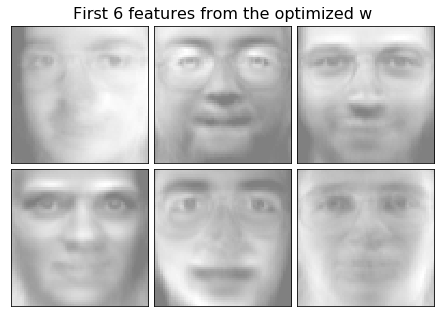

In [129]:
iterations = 500


w_opt_best, h_opt_best = face_extract(X, 0.5, 0.5, 500, 0.02)
plot_gallery("First 6 features from the optimized w", w_opt_best.T[:6])

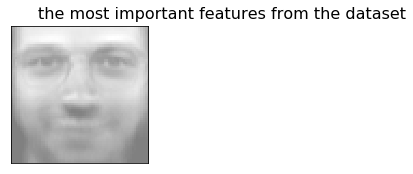

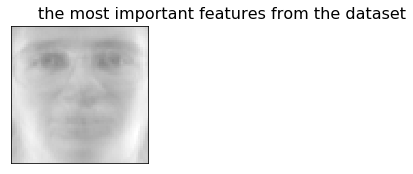

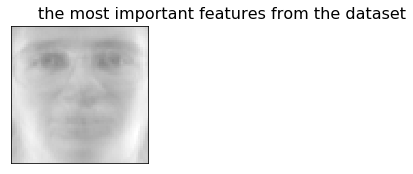

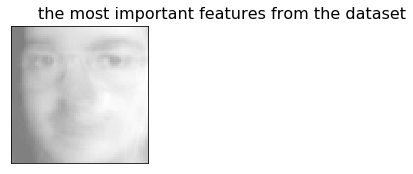

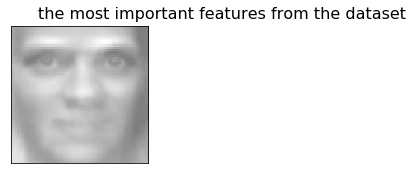

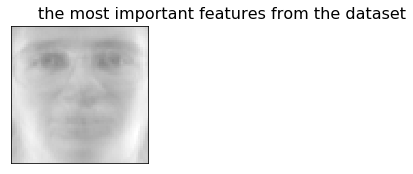

In [134]:
for i in range(6):
    h_six = h_opt_best[:,i]
    # h_sum = np.sum(h_six,axis=1)
    sorted_h_index = np.argsort(h_six,axis  =0)[::-1]
    plot_gallery("the most important features from the dataset", w_opt_best.T[sorted_h_index[:1]]) 
